### Solution: Build a classification neural network with Keras

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
from tensorflow import keras  # tf.keras
import time

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = (
    fashion_mnist.load_data())
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4423680/4422102 [==============================] - 0s 0us/step


### 2.1)
Build a `Sequential` model (`keras.models.Sequential`), without any argument, then and add four layers to it by calling its `add()` method:
  * a `Flatten` layer (`keras.layers.Flatten`) to convert each 28x28 image to a single row of 784 pixel values. Since it is the first layer in your model, you should specify the `input_shape` argument, leaving out the batch size: `[28, 28]`.
  * a `Dense` layer  (`keras.layers.Dense`) with 300 neurons (aka units), and the `"relu"` activation function.
  * Another `Dense` layer with 100 neurons, also with the `"relu"` activation function.
  * A final `Dense` layer with 10 neurons (one per class), and with the `"softmax"` activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.

In [3]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

### 2.2)
Alternatively, you can pass a list containing the 4 layers to the constructor of the `Sequential` model. The model's `layers` attribute holds the list of layers.

In [4]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [5]:
model.layers

### 2.3)
Call the model's `summary()` method and examine the output. Also, try using `keras.utils.plot_model()` to save an image of your model's architecture. Alternatively, you can uncomment the following code to display the image within Jupyter.

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### 2.4)
After a model is created, you must call its `compile()` method to specify the `loss` function and the `optimizer` to use. In this case, you want to use the `"sparse_categorical_crossentropy"` loss, and the `keras.optimizers.SGD(lr=1e-3)` optimizer (stochastic gradient descent with learning rate of 1e-3). Moreover, you can optionally specify a list of additional metrics that should be measured during training. In this case you should specify `metrics=["accuracy"]`. **Note**: you can find more loss functions in `keras.losses`, more metrics in `keras.metrics` and more optimizers in `keras.optimizers`.

In [8]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


### 2.5)
Now your model is ready to be trained. Call its `fit()` method, passing it the input features (`X_train`) and the target classes (`y_train`). Set `epochs=10` (or else it will just run for a single epoch). You can also (optionally) pass the validation data by setting `validation_data=(X_valid, y_valid)`. If you do, Keras will compute the loss and the additional metrics (the accuracy in this case) on the validation set at the end of each epoch. If the performance on the training set is much better than on the validation set, your model is probably overfitting the training set (or there is a bug, such as a mismatch between the training set and the validation set).
**Note**: the `fit()` method will return a `History` object containing training stats. Make sure to preserve it (`history = model.fit(...)`).

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 3.0727 - accuracy: 0.6434 - val_loss: 0.8148 - val_accuracy: 0.6784
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7133 - accuracy: 0.7111 - val_loss: 0.6772 - val_accuracy: 0.7384
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6390 - accuracy: 0.7358 - val_loss: 0.6503 - val_accuracy: 0.7176
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5871 - accuracy: 0.7612 - val_loss: 0.6012 - val_accuracy: 0.7580
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5481 - accuracy: 0.7767 - val_loss: 0.6243 - val_accuracy: 0.7338
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5148 - accuracy: 0.7924 - val_loss: 0.5578 - val_accuracy: 0.8006
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4769 - accuracy: 0.8193 - val_loss: 0.5466 - val_accuracy:

### 2.6)
Try running `pd.DataFrame(history.history).plot()` to plot the learning curves. To make the graph more readable, you can also set `figsize=(8, 5)`, call `plt.grid(True)` and `plt.gca().set_ylim(0, 1)`.

In [ ]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_xlim(0, 1)
    plt.gca().set_ylim(0, 1)
    plt.show()

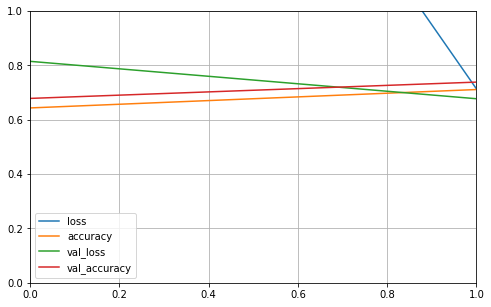

In [ ]:
plot_learning_curves(history)

### 2.7)
Try running `model.fit()` again, and notice that training continues where it left off.

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4084 - accuracy: 0.8506 - val_loss: 0.4684 - val_accuracy: 0.8480
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3968 - accuracy: 0.8537 - val_loss: 0.4788 - val_accuracy: 0.8424
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3867 - accuracy: 0.8577 - val_loss: 0.4937 - val_accuracy: 0.8268
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3781 - accuracy: 0.8604 - val_loss: 0.4524 - val_accuracy: 0.8508
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3719 - accuracy: 0.8634 - val_loss: 0.5109 - val_accuracy: 0.8214
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3642 - accuracy: 0.8653 - val_loss: 0.4626 - val_accuracy: 0.8486
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3591 - accuracy: 0.8680 - val_loss: 0.4612 - val_accuracy:

### 2.8)
Call the model's `evaluate()` method, passing it the test set (`X_test` and `y_test`). This will compute the loss (cross-entropy) on the test set, as well as all the additional metrics (in this case, the accuracy). Your model should achieve over 80% accuracy on the test set.

In [ ]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 45us/sample - loss: 0.4884 - acc: 0.8344


[0.48841091485023497, 0.8344]

### 2.9)
Define `X_new` as the first 10 instances of the test set. Call the model's `predict()` method to estimate the probability of each class for each instance (for better readability, you may use the output array's `round()` method):

In [ ]:
n_new = 10
X_new = X_test[:n_new]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.23, 0.  , 0.33, 0.05, 0.02, 0.  , 0.35, 0.  , 0.01, 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.54, 0.  , 0.41, 0.  , 0.05, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.06, 0.  , 0.08, 0.  , 0.86, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ]],
      dtype=float32)

### 2.10)
Often, you may only be interested in the most likely class. Use `np.argmax()` to get the class ID of the most likely class for each instance. **Tip**: you want to set `axis=1`.

In [ ]:
y_pred = y_proba.argmax(axis=1)
y_pred

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

### 2.11)
Call the model's `predict_classes()` method for `X_new`. You should get the same result as above.

In [ ]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

### 2.12)
(Optional) It is often useful to know how confident the model is for each prediction. Try finding the estimated probability for each predicted class using `np.max()`.

In [ ]:
y_proba.max(axis=1).round(2)

array([0.96, 0.89, 1.  , 1.  , 0.53, 1.  , 0.74, 0.96, 1.  , 1.  ],
      dtype=float32)

### 2.13)
(Optional) It is frequent to want the top k classes and their estimated probabilities rather just the most likely class. You can use `np.argsort()` for this.

In [ ]:
k = 3
top_k = np.argsort(-y_proba, axis=1)[:, :k]
top_k

array([[9, 7, 5],
       [2, 6, 4],
       [1, 0, 3],
       [1, 3, 8],
       [6, 2, 4],
       [1, 0, 4],
       [4, 2, 6],
       [6, 4, 2],
       [5, 7, 9],
       [7, 5, 8]])

In [ ]:
row_indices = np.tile(np.arange(len(top_k)), [k, 1]).T
y_proba[row_indices, top_k].round(2)

array([[0.96, 0.03, 0.  ],
       [0.89, 0.06, 0.05],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.53, 0.2 , 0.18],
       [1.  , 0.  , 0.  ],
       [0.74, 0.21, 0.05],
       [0.96, 0.04, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ]], dtype=float32)